In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Ecommerce Customers.csv.xls')
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [3]:
df.tail(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [8]:
df.drop(['Email','Address'],axis=1,inplace=True)

In [9]:
df.drop('Avatar',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [11]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## visualization

In [12]:
#renaming
df=df.rename({'Avg. Session Length':'Avg_Session_Length','Time on App':'Time_on_App','Time on Website':'Time_on_Website',
             'Length of Membership':'Length_of_Membership','Yearly Amount Spent':'Yearly_Amount_Spent'},axis=1)


In [13]:
df.columns

Index(['Avg_Session_Length', 'Time_on_App', 'Time_on_Website',
       'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [14]:
# Yearly_amount_spent

len(df.Yearly_Amount_Spent.unique())

500

[Text(0.5, 0, '')]

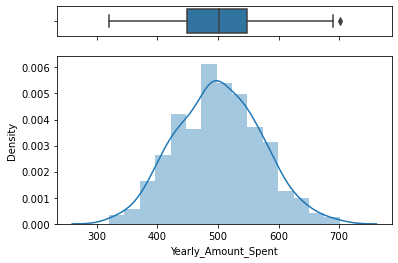

In [65]:
#cutting the window into two 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["Yearly_Amount_Spent"], ax=ax_box)
sns.distplot(df["Yearly_Amount_Spent"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [16]:
#remove outliers
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return [x for x in data if x >= lower_bound and x <= upper_bound]

In [17]:
#df["Yearly_Amount_Spent"] = remove_outliers(df["Yearly_Amount_Spent"])
df = df[df["Yearly_Amount_Spent"].isin(remove_outliers(df["Yearly_Amount_Spent"]))]

<AxesSubplot:xlabel='Yearly_Amount_Spent'>

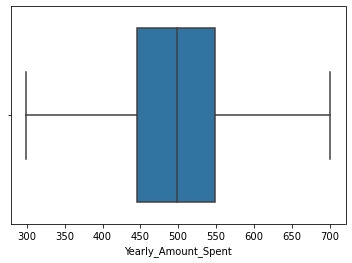

In [18]:
sns.boxplot(df.Yearly_Amount_Spent)

In [19]:
#Avg_Session_Length

len(df.Avg_Session_Length.unique())


491

[Text(0.5, 0, '')]

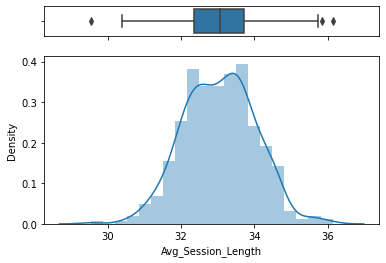

In [20]:
#cutting the window into two 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["Avg_Session_Length"], ax=ax_box)
sns.distplot(df["Avg_Session_Length"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [21]:
df=df[df['Avg_Session_Length'].isin(remove_outliers(df['Avg_Session_Length']))]

<AxesSubplot:xlabel='Avg_Session_Length'>

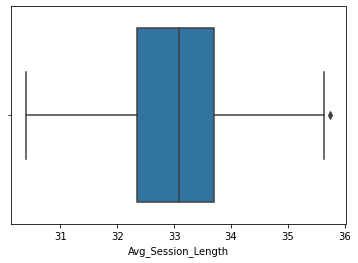

In [22]:
sns.boxplot(df.Avg_Session_Length)

[Text(0.5, 0, '')]

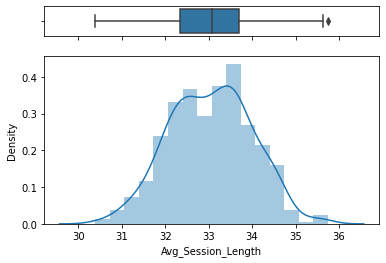

In [23]:
#cutting the window into two 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["Avg_Session_Length"], ax=ax_box)
sns.distplot(df["Avg_Session_Length"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [24]:
df.columns

Index(['Avg_Session_Length', 'Time_on_App', 'Time_on_Website',
       'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [25]:
# time_on_app
len(df.Time_on_App.unique())

488

[Text(0.5, 0, '')]

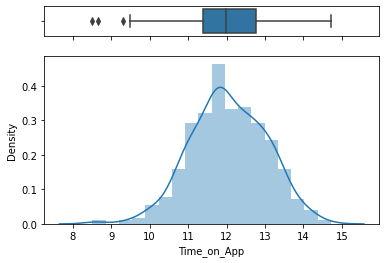

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(df["Time_on_App"],ax=ax_box)
sns.distplot(df['Time_on_App'],ax=ax_hist)
ax_box.set(xlabel='')

In [27]:
#removing outliers
df=df[df['Time_on_App'].isin(remove_outliers(df['Time_on_App']))]

<AxesSubplot:xlabel='Time_on_App'>

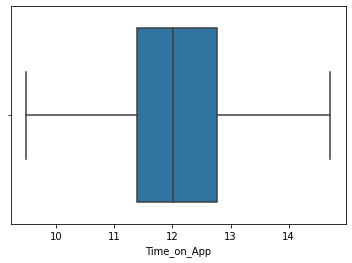

In [28]:
sns.boxplot(df.Time_on_App)

In [29]:
#Time_on_Website
len(df.Time_on_Website.unique())

485

[Text(0.5, 0, '')]

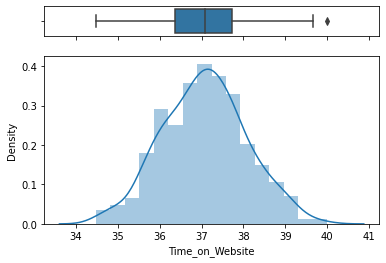

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(df["Time_on_Website"],ax=ax_box)
sns.distplot(df['Time_on_Website'],ax=ax_hist)
ax_box.set(xlabel='')

In [31]:
#removing outliers
df=df[df['Time_on_Website'].isin(remove_outliers(df['Time_on_Website']))]

<AxesSubplot:xlabel='Time_on_Website'>

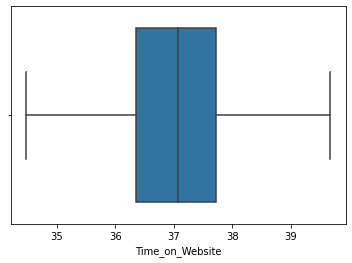

In [32]:
sns.boxplot(df.Time_on_Website)

In [33]:
# Length_of_Membership
len(df.Length_of_Membership.unique())

484

[Text(0.5, 0, '')]

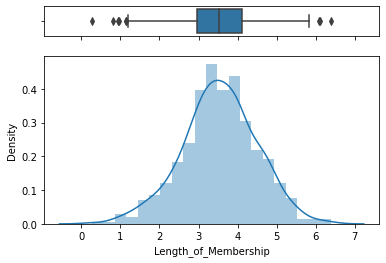

In [34]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(df["Length_of_Membership"],ax=ax_box)
sns.distplot(df['Length_of_Membership'],ax=ax_hist)
ax_box.set(xlabel='')

In [35]:
#removing outliers
df=df[df['Length_of_Membership'].isin(remove_outliers(df['Length_of_Membership']))]

<AxesSubplot:xlabel='Length_of_Membership'>

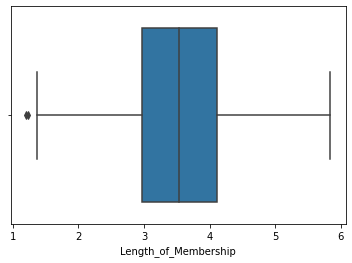

In [36]:
sns.boxplot(df.Length_of_Membership)

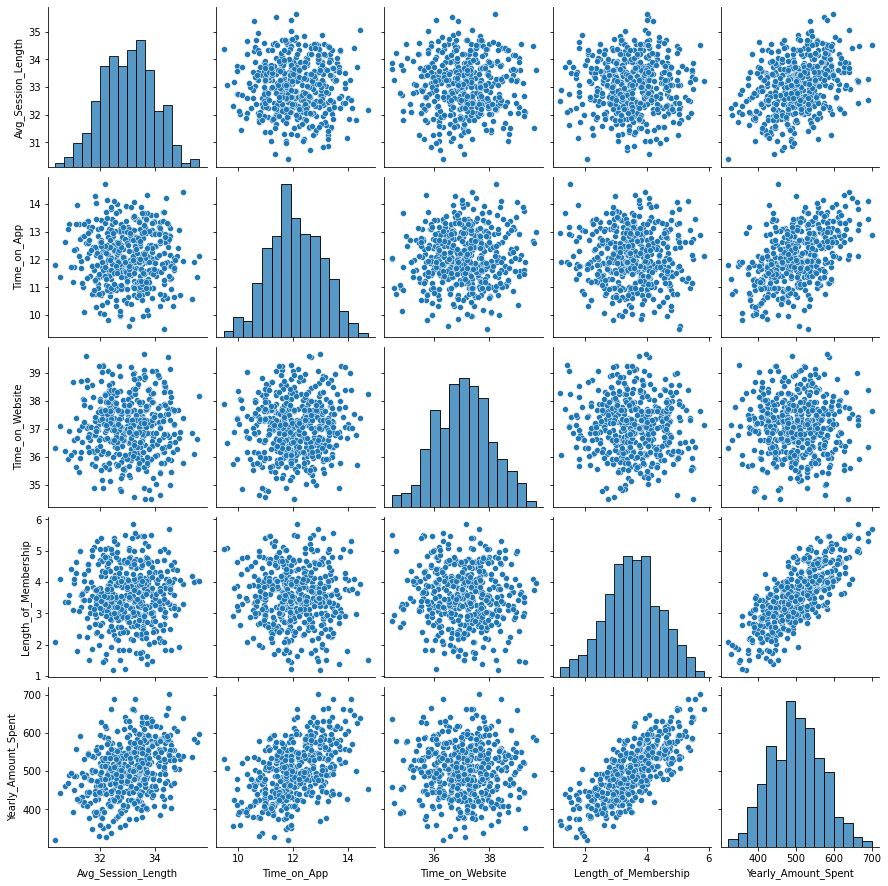

In [37]:
sns.pairplot(df)

## building model


In [38]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg_Session_Length    475 non-null    float64
 1   Time_on_App           475 non-null    float64
 2   Time_on_Website       475 non-null    float64
 3   Length_of_Membership  475 non-null    float64
dtypes: float64(4)
memory usage: 18.6 KB


In [40]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 475 entries, 0 to 499
Series name: Yearly_Amount_Spent
Non-Null Count  Dtype  
--------------  -----  
475 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


## standard scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=20)

## linear regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [46]:
lr=LinearRegression()

In [47]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_lr=round(r2_score(y_test,y_pred)*100,2)
print('R2_score: ',r2_lr)
mse_lr=round(mean_squared_error(y_test,y_pred),2)
print('MSE_score:',mse_lr)
rmse = np.sqrt(mse_lr)
print('RMSE:',rmse)

R2_score:  97.62
MSE_score: 105.28
RMSE: 10.260604270704528


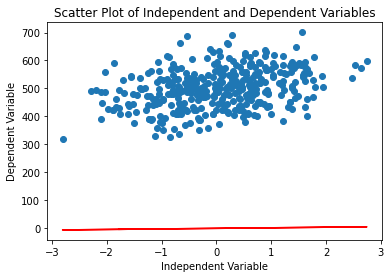

In [48]:
#linearity

plt.scatter(X_train[:,0], y_train)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.plot(X_train[:,0], X_train[:,0] * 2, '-r')
plt.title("Scatter Plot of Independent and Dependent Variables")
plt.show()

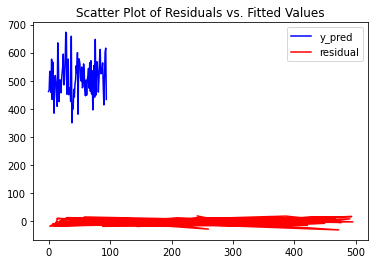

In [49]:
residuals=(y_test - y_pred)
#homoscadasticity

plt.plot(y_pred,'b',label='y_pred')
plt.plot(residuals,'r',label='residual')
plt.legend()
plt.title("Scatter Plot of Residuals vs. Fitted Values")
plt.show()

## Decision tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [51]:
#define the parameter space for the hyperparemeters

param_grid={'splitter':['best','random'],
           'criterion':['mse', 'friedman_mse'],
           'max_depth':sp_randint(2,10),
           'min_samples_split':sp_randint(1,10)}

In [52]:
#create the Randomizedsearchcv object
decireg=DecisionTreeRegressor()
random_search=RandomizedSearchCV(decireg,param_grid,cv=5,n_jobs=-1)

In [53]:
random_search.fit(X_train,y_train)
y_pred1=random_search.predict(X_test)
r2_dt=round(r2_score(y_test,y_pred1)*100,2)
print('R2 score:',r2_dt)
mse_dt=round(mean_squared_error(y_test,y_pred1),2)
print('mse: ',mse_dt)
rmse_dt=round(np.sqrt(mse_dt),2)
print('RMSE:',rmse_dt)

R2 score: 83.76
mse:  718.42
RMSE: 26.8


## random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint

In [55]:
rf = RandomForestRegressor(random_state=20)

In [56]:
# Use RandomizedSearchCV to find the best number of estimators
param_distributions = {'n_estimators': sp_randint(10, 100)}
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000154CB3CA9D0>})

In [57]:
# Get the best number of estimators
best_n_estimators = random_search.best_params_['n_estimators']

In [58]:
# Train the random forest model with the best number of estimators
rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=88, random_state=42)

In [59]:
y_pred2=rf.predict(X_test)
r2_rf=round(r2_score(y_test,y_pred2)*100,2)
print('R2 score:',r2_rf)
mse_rf=round(mean_squared_error(y_test,y_pred2),2)
print('mse: ',mse_rf)
rmse_rf=round(np.sqrt(mse_rf),2)
print('RMSE:',rmse_rf)

R2 score: 92.91
mse:  313.58
RMSE: 17.71
